In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
# List of all standard 20 amino acids 
aaList = 'ARNDCQEGHILKMFPSTWYV'
# scores for amino acid indices
scores = pd.read_csv("./data/physicochemical_scores.csv", index_col=0)

In [30]:
df = pd.read_csv("./data/MHC-1_processed.csv")
alleles_list = list(pd.unique(df['allele']))
A_alleles = list(np.sort([idx for idx in alleles_list if idx.startswith("HLA-A")]))
B_alleles = list(np.sort([idx for idx in alleles_list if idx.startswith("HLA-B")]))
C_alleles = list(np.sort([idx for idx in alleles_list if idx.startswith("HLA-C")]))
all_alleles = [y for x in [A_alleles, B_alleles, C_alleles] for y in x]
targeted_alleles =[]
summary_df = pd.DataFrame(columns= ['Allele', '#Peptides'])
for mhc in all_alleles:
    sub_df = df[df['allele'] == mhc]
    if sub_df.shape[0] >= 200:
        targeted_alleles.append(mhc)
        summary_df = summary_df.append({'Allele': mhc, '#Peptides':sub_df.shape[0]}, ignore_index=True)
#print(summary_df)
#targeted_alleles
sdf = summary_df.rename(index = {i: i +1 for i in range(summary_df.shape[0])})
#print(sdf.to_latex(col_space = 5, longtable=True, index = False))

In [35]:
np.sum(sdf['#Peptides'])


38550

In [3]:
# function to read peptides belong to a given allel
def read_peptids(allele):
    d = pd.read_csv("./data/MHC-1_processed.csv")
    #print(d.shape)
    d = d[d['allele']==allele]
    print(d.shape)
    peptids_lengths = [len(i) for i in d["peptide"]]
    print(max(peptids_lengths), np.mean(peptids_lengths))
    #plt.hist(x= peptids_lengths, bins= range(min(peptids_lengths), max(peptids_lengths)+2),  log= True, color='red')
    plt.boxplot(x= peptids_lengths)
    plt.show()
    return pd.DataFrame(d)
#read_peptids('HLA-A11:01')

def get_processed(peptide):
    '''
     A function to generate 2-dim image like array for AA sequences of a given peptide
    '''
    df = pd.DataFrame(0.05*np.ones((20,9)), index = [aa for aa in aaList], columns= list(range(9)))
    lm = min(len(peptide), 9)
    for i in range(lm):
        df.loc[peptide[i], i] = 0.9 
    return df

def process_data(allele="HLA-A02:01"):
    '''
    function to process the entire data set for particular allele  
    ''' 
    df = read_peptids(allele)
    m = df.shape[0]
    #creating a place holder for matrix
    mat = np.zeros((m,20, 9))
    for i in range(m):
        mat[i,...] = get_processed(list(df['peptide'])[i])
    print("all is done for  %s  allele" %(allele))
    return mat


In [4]:
df = pd.read_csv("./data/MHC-1_processed.csv")
alleles_list = list(pd.unique(df['allele']))
A_alleles = list(np.sort([idx for idx in alleles_list if idx.startswith("HLA-A")]))
B_alleles = list(np.sort([idx for idx in alleles_list if idx.startswith("HLA-B")]))
C_alleles = list(np.sort([idx for idx in alleles_list if idx.startswith("HLA-C")]))

(734, 3)
12 9.241144414168938


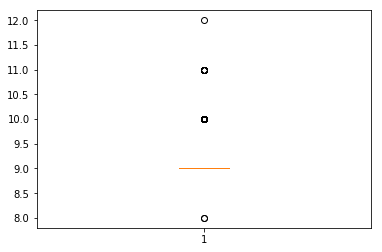

all is done for  HLA-A01:01  allele
(4814, 3)
14 9.288948899044454


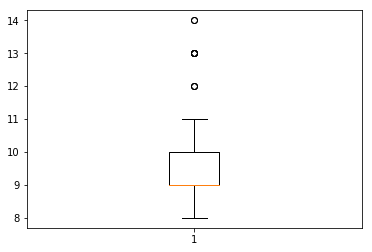

all is done for  HLA-A02:01  allele
(1869, 3)
14 9.396468699839486


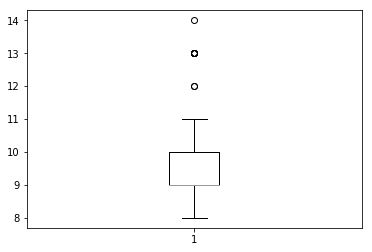

all is done for  HLA-A02:02  allele
(2424, 3)
14 9.35973597359736


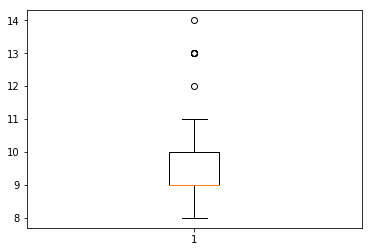

all is done for  HLA-A02:03  allele
(2278, 3)
14 9.32484635645303


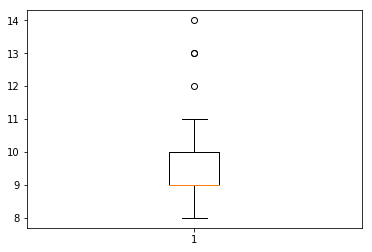

all is done for  HLA-A02:06  allele
(404, 3)
9 8.992574257425742


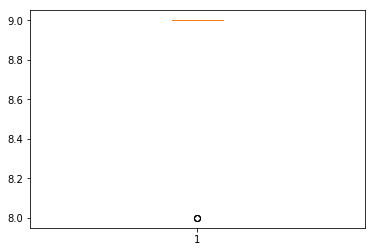

all is done for  HLA-A02:11  allele
(308, 3)
9 8.993506493506494


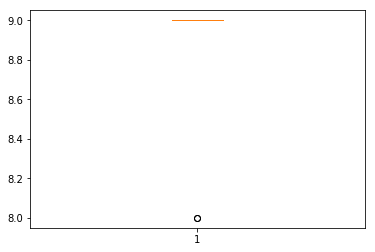

all is done for  HLA-A02:12  allele
(234, 3)
9 8.987179487179487


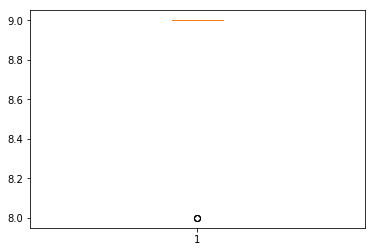

all is done for  HLA-A02:19  allele
(2180, 3)
13 9.355045871559634


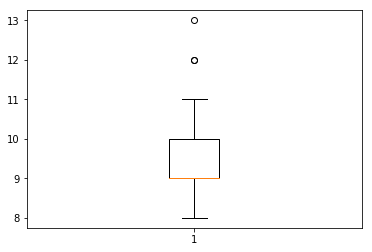

all is done for  HLA-A03:01  allele
(2226, 3)
11 9.381850853548967


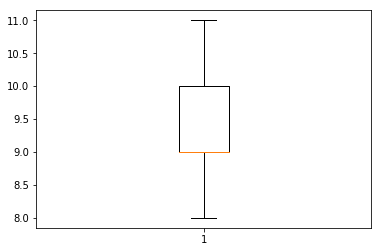

all is done for  HLA-A11:01  allele
(612, 3)
13 9.320261437908497


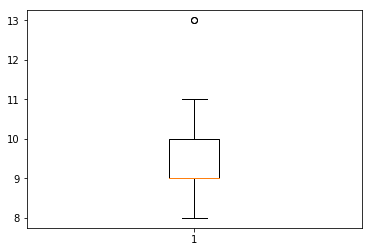

all is done for  HLA-A23:01  allele
(753, 3)
14 9.272244355909695


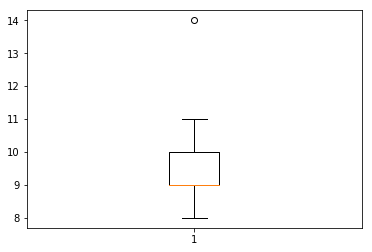

all is done for  HLA-A24:02  allele
(332, 3)
10 9.0


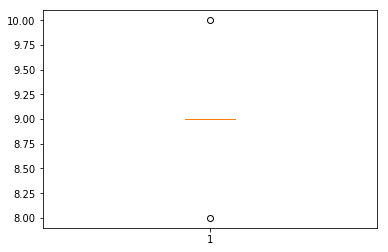

all is done for  HLA-A24:03  allele
(516, 3)
11 9.207364341085272


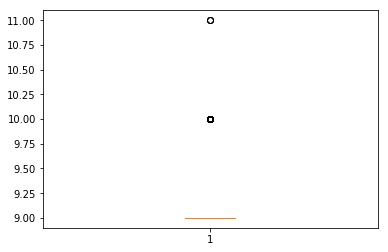

all is done for  HLA-A26:01  allele
(726, 3)
13 9.269972451790634


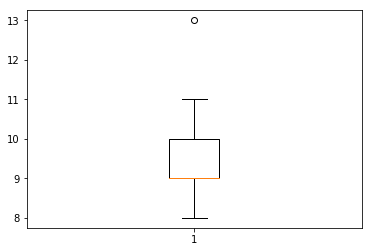

all is done for  HLA-A29:02  allele
(776, 3)
10 9.047680412371134


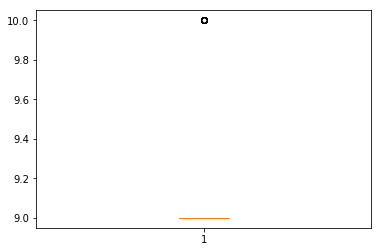

all is done for  HLA-A30:01  allele
(644, 3)
11 9.383540372670808


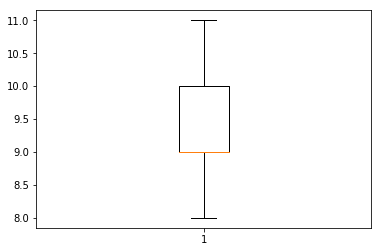

all is done for  HLA-A30:02  allele
(1616, 3)
11 9.366955445544555


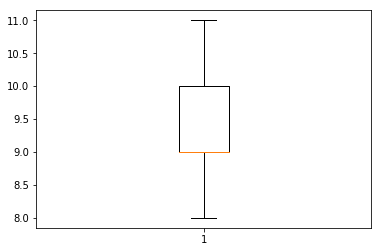

all is done for  HLA-A31:01  allele
(410, 3)
10 9.036585365853659


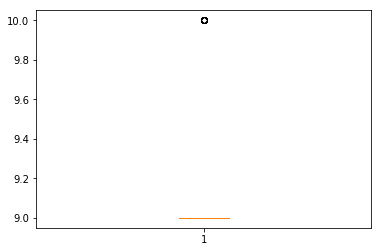

all is done for  HLA-A32:01  allele
(712, 3)
13 9.456460674157304


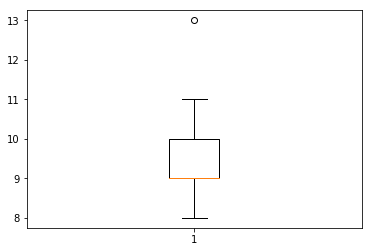

all is done for  HLA-A33:01  allele
(1605, 3)
13 9.471651090342679


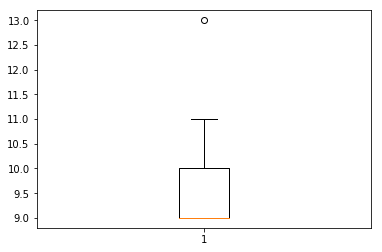

all is done for  HLA-A68:01  allele
(1351, 3)
13 9.376017764618801


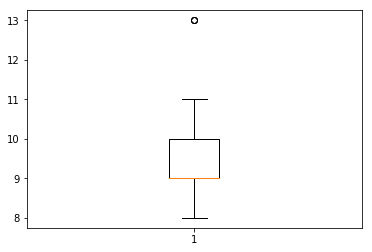

all is done for  HLA-A68:02  allele
(249, 3)
10 9.004016064257028


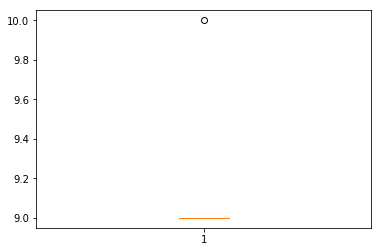

In [ ]:
 with h5py.File("./data/MHCpan4.1/real_dataset_pure_encodeing.hdf5", "w") as hf: 
    for mhc in targeted_alleles:
        mat = process_data(mhc)
        hf.create_dataset(mhc+"_dataset", data =mat)